In [283]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import warnings 
import pprint
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [284]:
# load dataset 
data = pd.read_csv('Company_data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [285]:
# dataset contains 400 observations 
# and 11 columns 
data.shape

(400, 11)

In [286]:
# 3 categorical columns present 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [287]:
# categorizing sales data into 
# 'high' for sale greater than average sales
# and 'Low' for sale less than or equal to average sales 
try :
    data.Sales = data.Sales.apply(lambda x: 'High' if (x > data.Sales.mean()) else 'Low')
except :
    print('Already categorized sales data.')

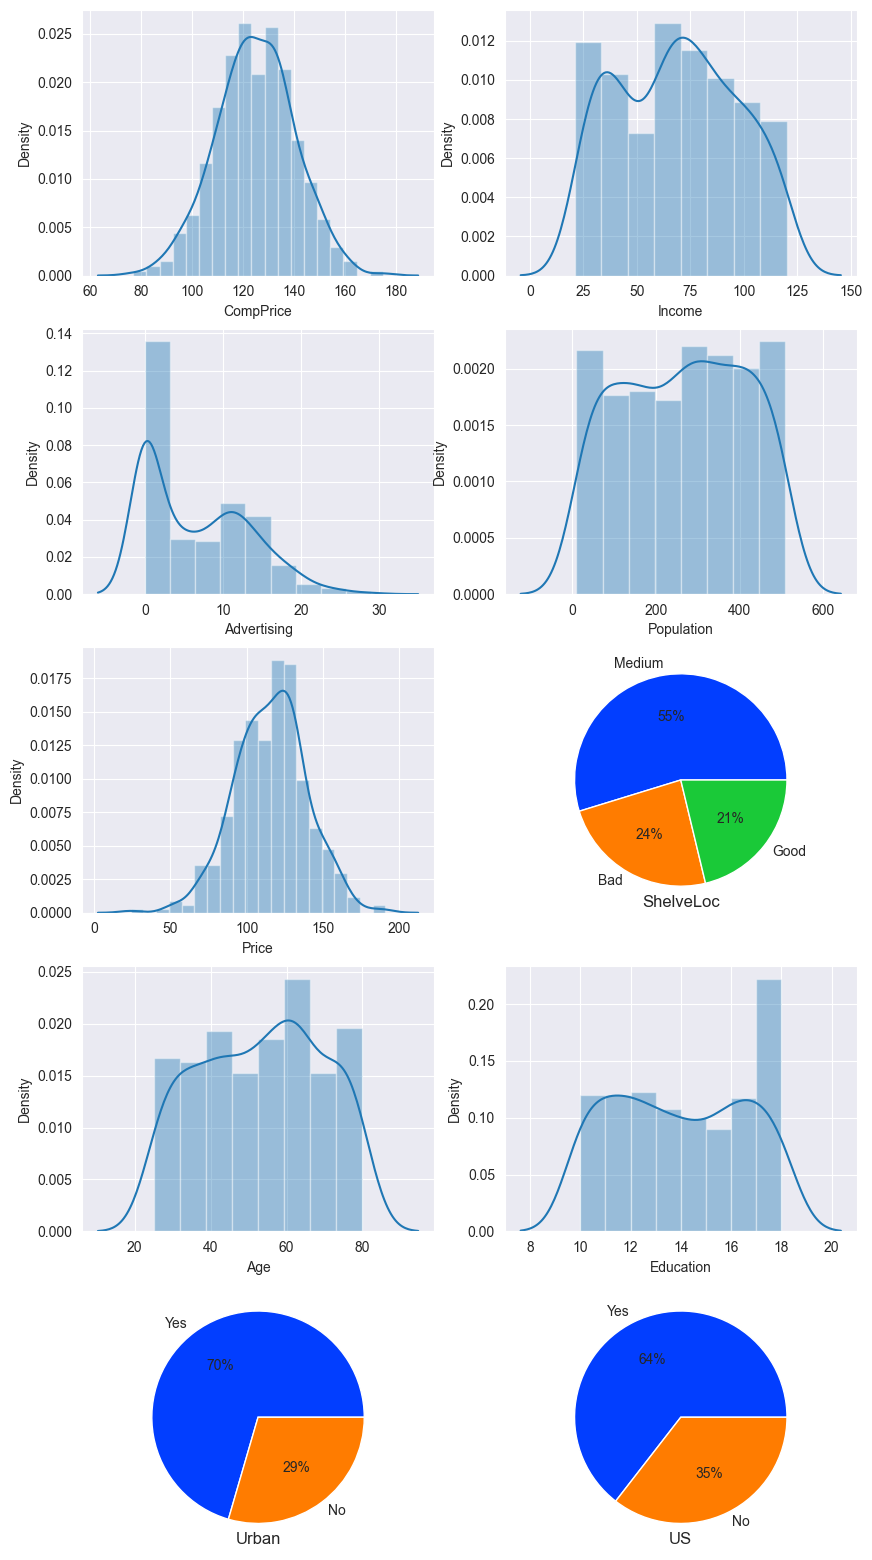

In [288]:
# visualizing feature data 
plt.figure(figsize=(10,20))
for p in range(1,11):
    col = data.columns[p]
    if data[col].dtype == 'object':
        plt.subplot(5,2,p)
        n = data[col].value_counts()
        plt.pie(n.values,labels=n.index,
                colors=sns.color_palette('bright'),autopct='%.0f%%')
        plt.title(data.columns[p],y=-0.01)
    else :
        plt.subplot(5,2,p)
        sns.distplot(data[col])

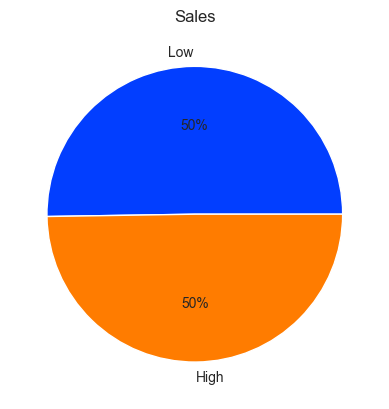

In [289]:
# visualizing target data 
# target data is balanced 
# accuracy can be cosidered for model evaluation 
n = data.Sales.value_counts()
plt.pie(n.values,labels=n.index,
        colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title('Sales')
plt.show()

In [290]:
# deepcopy of dataframe 'data'
encData = data.copy(deep=True)
encDict = {}

In [291]:
# label encoding categorical columns 
for col in data.columns[[data[col].dtype == 'object' for col in data.columns]]:
    enc = LabelEncoder()
    encData[col] = enc.fit_transform(data[col])
    encDict[col] = dict(zip(np.arange(enc.classes_.size),enc.classes_))
pprint.pprint(encDict)

{'Sales': {0: 'High', 1: 'Low'},
 'ShelveLoc': {0: 'Bad', 1: 'Good', 2: 'Medium'},
 'US': {0: 'No', 1: 'Yes'},
 'Urban': {0: 'No', 1: 'Yes'}}


In [292]:
# label encoded dataframe 
encData.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [293]:
# segregating data into features and target 'Sales'
X = encData.iloc[:,1:]
Y = encData[['Sales']]

In [294]:
# splitting data for training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=42)

In [295]:
# creating basemodel for hyperparameter tunning
baseModel = RandomForestClassifier(random_state=42)
max_depth = [2,10,25]
min_samples_leaf = [2,4,6]
n_estimators = [10,20,30]

param_grid = dict(max_depth=max_depth,
                  min_samples_leaf=min_samples_leaf,
                  n_estimators=n_estimators)
pprint.pprint(param_grid)

{'max_depth': [2, 10, 25],
 'min_samples_leaf': [2, 4, 6],
 'n_estimators': [10, 20, 30]}


In [296]:
# performing hyperparameter tunning with brute force approach 
grid = GridSearchCV(estimator=baseModel,
                    param_grid=param_grid,
                    cv=4,verbose=10,scoring='accuracy')
grid.fit(X_train,Y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4; 1/27] START max_depth=2, min_samples_leaf=2, n_estimators=10...........
[CV 1/4; 1/27] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=0.688 total time=   0.0s
[CV 2/4; 1/27] START max_depth=2, min_samples_leaf=2, n_estimators=10...........
[CV 2/4; 1/27] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 3/4; 1/27] START max_depth=2, min_samples_leaf=2, n_estimators=10...........
[CV 3/4; 1/27] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 4/4; 1/27] START max_depth=2, min_samples_leaf=2, n_estimators=10...........
[CV 4/4; 1/27] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=0.688 total time=   0.0s
[CV 1/4; 2/27] START max_depth=2, min_samples_leaf=2, n_estimators=20...........
[CV 1/4; 2/27] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=0.713 total time=   0.0s
[CV 2/4; 2/27] START max_dep

[CV 2/4; 12/27] END max_depth=10, min_samples_leaf=2, n_estimators=30;, score=0.688 total time=   0.0s
[CV 3/4; 12/27] START max_depth=10, min_samples_leaf=2, n_estimators=30.........
[CV 3/4; 12/27] END max_depth=10, min_samples_leaf=2, n_estimators=30;, score=0.800 total time=   0.0s
[CV 4/4; 12/27] START max_depth=10, min_samples_leaf=2, n_estimators=30.........
[CV 4/4; 12/27] END max_depth=10, min_samples_leaf=2, n_estimators=30;, score=0.750 total time=   0.1s
[CV 1/4; 13/27] START max_depth=10, min_samples_leaf=4, n_estimators=10.........
[CV 1/4; 13/27] END max_depth=10, min_samples_leaf=4, n_estimators=10;, score=0.738 total time=   0.0s
[CV 2/4; 13/27] START max_depth=10, min_samples_leaf=4, n_estimators=10.........
[CV 2/4; 13/27] END max_depth=10, min_samples_leaf=4, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/4; 13/27] START max_depth=10, min_samples_leaf=4, n_estimators=10.........
[CV 3/4; 13/27] END max_depth=10, min_samples_leaf=4, n_estimators=10;, score=0.

[CV 3/4; 23/27] END max_depth=25, min_samples_leaf=4, n_estimators=20;, score=0.800 total time=   0.0s
[CV 4/4; 23/27] START max_depth=25, min_samples_leaf=4, n_estimators=20.........
[CV 4/4; 23/27] END max_depth=25, min_samples_leaf=4, n_estimators=20;, score=0.713 total time=   0.0s
[CV 1/4; 24/27] START max_depth=25, min_samples_leaf=4, n_estimators=30.........
[CV 1/4; 24/27] END max_depth=25, min_samples_leaf=4, n_estimators=30;, score=0.775 total time=   0.0s
[CV 2/4; 24/27] START max_depth=25, min_samples_leaf=4, n_estimators=30.........
[CV 2/4; 24/27] END max_depth=25, min_samples_leaf=4, n_estimators=30;, score=0.738 total time=   0.0s
[CV 3/4; 24/27] START max_depth=25, min_samples_leaf=4, n_estimators=30.........
[CV 3/4; 24/27] END max_depth=25, min_samples_leaf=4, n_estimators=30;, score=0.800 total time=   0.0s
[CV 4/4; 24/27] START max_depth=25, min_samples_leaf=4, n_estimators=30.........
[CV 4/4; 24/27] END max_depth=25, min_samples_leaf=4, n_estimators=30;, score=0.

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 25],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=10)

In [297]:
# parameters giving best score 
print(f'Model gives Best Score : {round(grid.best_score_*100,2)}%\nWith params : \nmax_depth : {grid.best_params_["max_depth"]}\nmin_samples_leaf : {grid.best_params_["min_samples_leaf"]}\nn_estimators : {grid.best_params_["n_estimators"]}')

Model gives Best Score : 76.88%
With params : 
max_depth : 10
min_samples_leaf : 4
n_estimators : 20


In [298]:
# Random Forest Classifier with hypertuned parameters 
clf = RandomForestClassifier(n_estimators=20,
                              max_depth=10,
                              min_samples_leaf=4,
                              random_state=42)

In [299]:
# training RandomForestClassifier with hypertuned params 
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=20,
                       random_state=42)

In [300]:
print(f'Training Accuracy of final model : {round(clf.score(X_train,Y_train)*100,2)}%')
print(f'Testing Accuracy of final model : {round(clf.score(X_test,Y_test)*100,2)}%')

Training Accuracy of final model : 95.0%
Testing Accuracy of final model : 81.25%


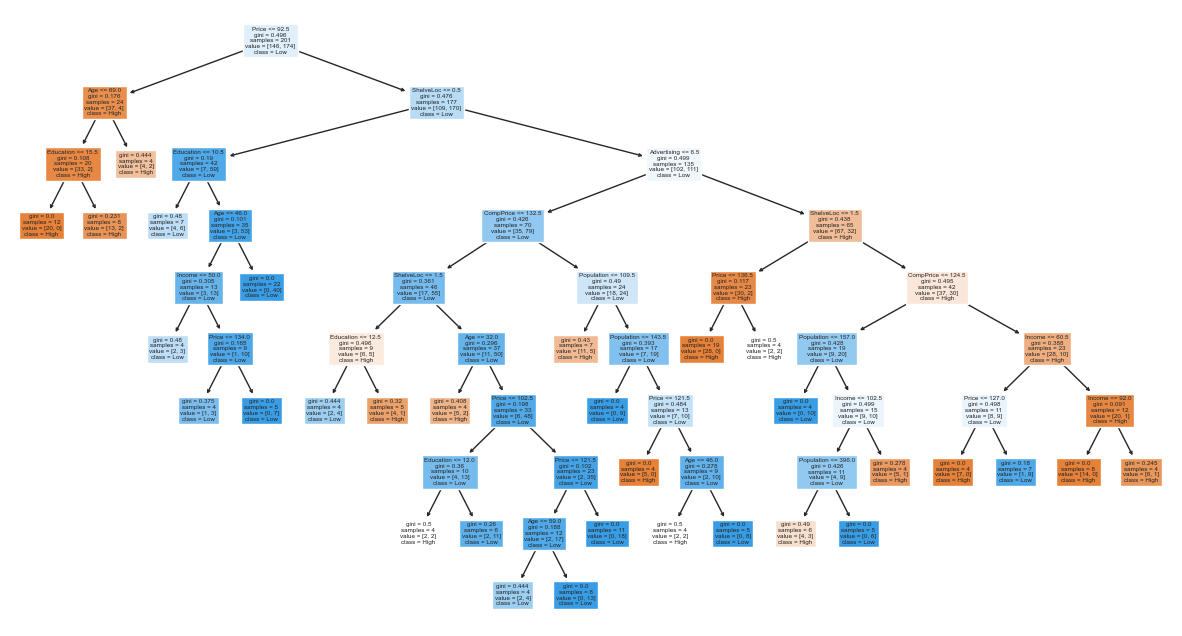

In [301]:
# visualizing trees created by 3 estimators 
# DT by first estimator
plt.figure(figsize=(15,8))
plot_tree(clf.estimators_[0],
          feature_names=X.columns,
          class_names=['High','Low'],
         filled=True)
plt.show()

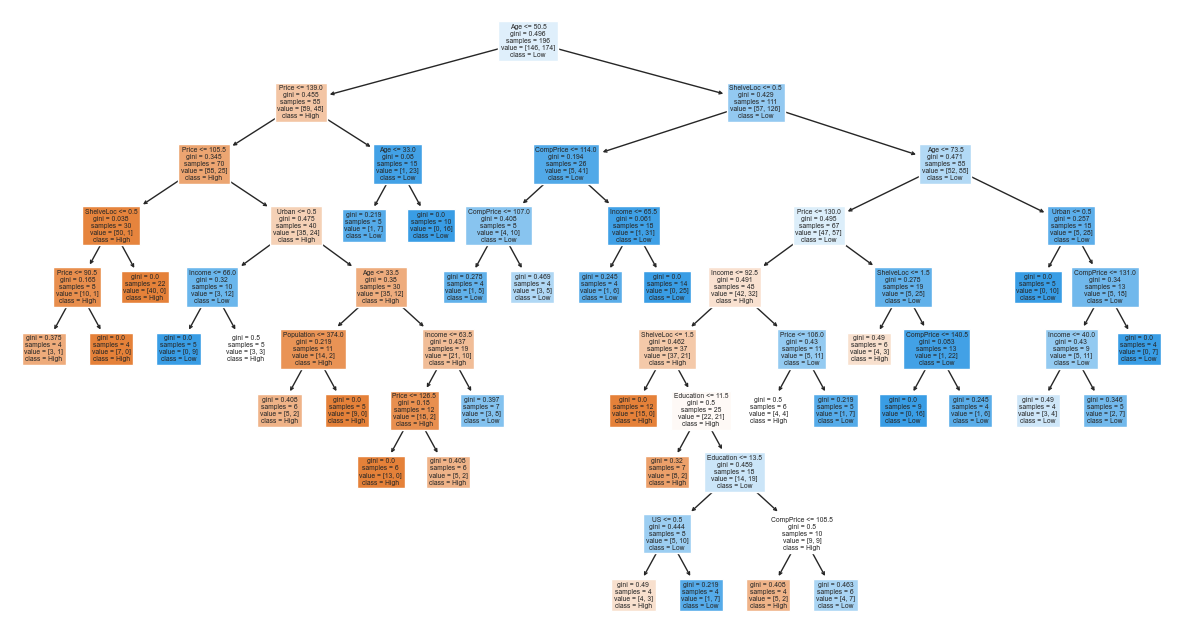

In [302]:
# DT by second estimator
plt.figure(figsize=(15,8))
plot_tree(clf.estimators_[1],
          feature_names=X.columns,
          class_names=['High','Low'],
          filled=True)
plt.show()

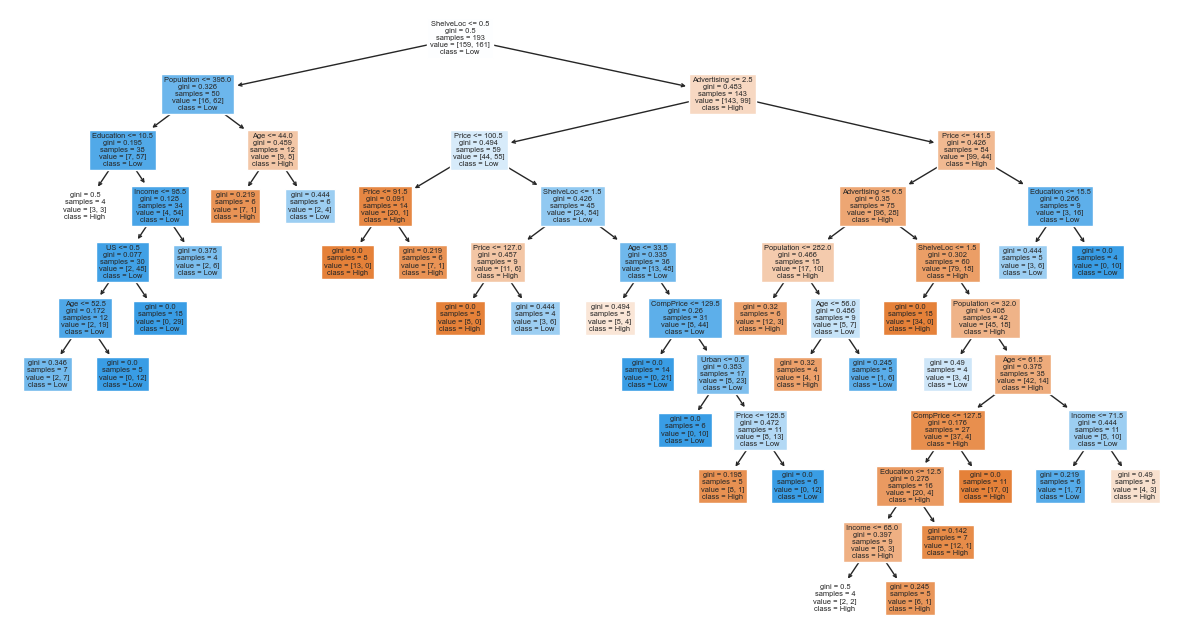

In [303]:
# DT by third estimator
plt.figure(figsize=(15,8))
plot_tree(clf.estimators_[2],
          feature_names=X.columns,
          class_names=['High','Low'],
          filled=True)
plt.show()

In [304]:
# get feature importance 
feat_imp = pd.DataFrame(list(zip(X.columns,clf.feature_importances_)),
                        columns=['feature','importance']).sort_values(by='importance',ascending=False)
feat_imp

,feature,importance
4,Price,0.294840
6,Age,0.137630
2,Advertising,0.128988
5,ShelveLoc,0.120730
0,CompPrice,0.098933
3,Population,0.084428
1,Income,0.070636
7,Education,0.040488
8,Urban,0.013080
9,US,0.010247


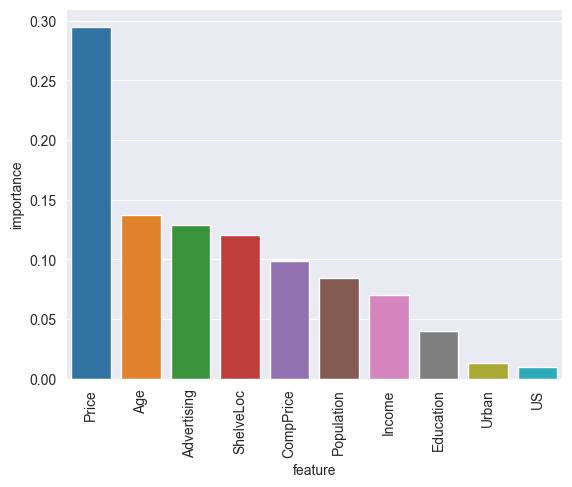

In [305]:
# 'Price' is most important feature
# while 'US' is least important feature 
sns.barplot(x='feature',y='importance',
            data=feat_imp)
plt.xticks(rotation=90)
plt.show()

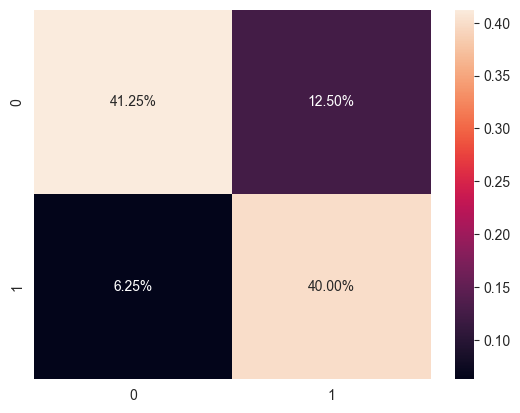

In [306]:
c_matrix = confusion_matrix(Y_test,clf.predict(X_test))
sns.heatmap(c_matrix/c_matrix.sum(),
            annot=True,
            fmt='.2%')
plt.show()

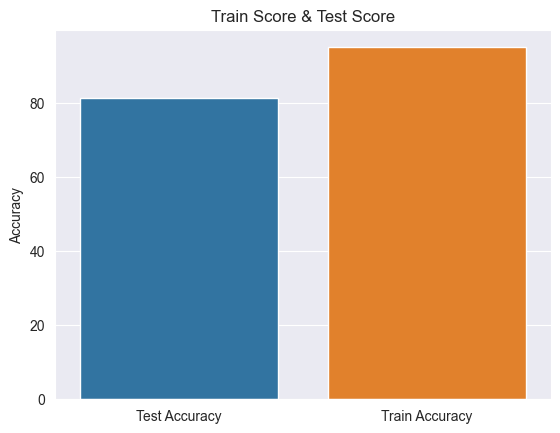

In [307]:
sns.barplot(x=['Test Accuracy','Train Accuracy'],
            y=[round(clf.score(X_test,Y_test)*100,2),
               round(clf.score(X_train,Y_train)*100,2)])
plt.ylabel('Accuracy')
plt.title('Train Score & Test Score')
plt.show()

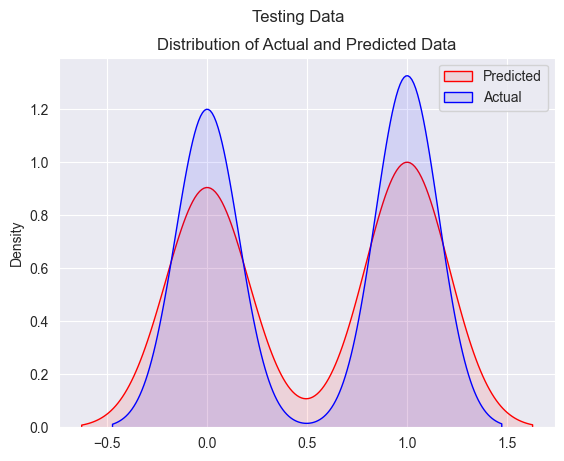

In [308]:
sns.distplot(clf.predict(X_test),hist=False,color='red',
             kde_kws={'shade':True,'alpha':0.1})
sns.distplot(clf.predict(X_train),hist=False,color='blue',
             kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper right')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Testing Data')
plt.show()

In [309]:
# model gives 81% f1 score 
print(classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        43
           1       0.76      0.86      0.81        37

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



In [310]:
# prediction on test data
pred = X_test.reset_index(drop='index').join(pd.DataFrame(clf.predict(X_test),
                                                    columns=['Predicted Sales']))
pred['Predicted Sales'] = pred['Predicted Sales'].replace(encDict['Sales'])
pred

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Predicted Sales
0,98,21,11,326,90,0,76,11,0,1,Low
1,121,86,10,496,145,0,51,10,1,1,Low
2,114,38,13,317,128,1,50,16,1,1,High
3,125,41,2,357,123,0,47,14,0,1,Low
4,145,30,0,67,104,2,55,17,1,0,High
...,...,...,...,...,...,...,...,...,...,...,...
75,120,56,20,266,90,0,78,18,1,1,Low
76,113,64,10,68,101,2,57,16,1,1,High
77,135,100,22,463,122,2,36,14,1,1,High
78,138,107,9,480,154,2,47,11,0,1,Low


## RandomForestClassifier on Sales data with training accuracy of 95% and testing accuracy of 81.25%